<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Momentum_Research_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momentum Research Visualization
Includes:
- 2D Contour
- 3D Loss Surface
- Epoch-wise Trajectory
- GIF Animation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [2]:
# Loss Function
def loss_function(w):
    x, y = w
    return 0.5 * (x**2 + 10*y**2)

def gradient(w):
    x, y = w
    return np.array([x, 10*y])

In [3]:

def optimizer(lr=0.1, beta=0.9, epochs=100):
    w = np.array([8.0, 8.0])
    v = np.zeros_like(w)
    trajectory = [w.copy()]
    for _ in range(epochs):
        v = beta * v + lr * gradient(w)
        w -= v
        trajectory.append(w.copy())
    return np.array(trajectory)


In [4]:
trajectory = optimizer()

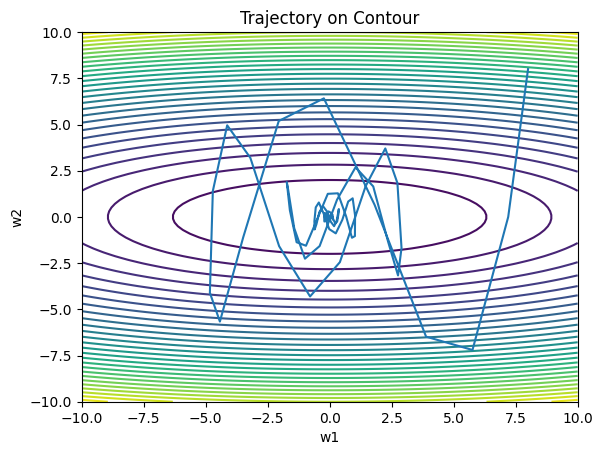

In [5]:
# Contour Plot
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (X**2 + 10*Y**2)

plt.figure()
plt.contour(X, Y, Z, levels=30)
plt.plot(trajectory[:,0], trajectory[:,1])
plt.title('Trajectory on Contour')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

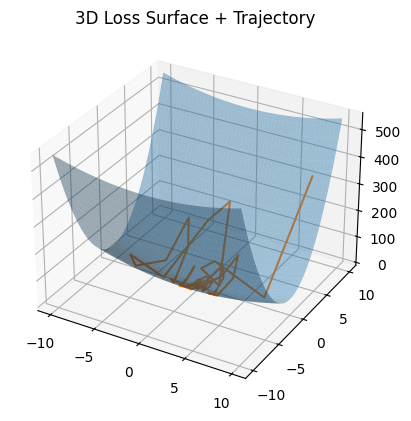

In [6]:
# 3D Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.4)
ax.plot(trajectory[:,0], trajectory[:,1],
        [loss_function(w) for w in trajectory])
ax.set_title('3D Loss Surface + Trajectory')
plt.show()

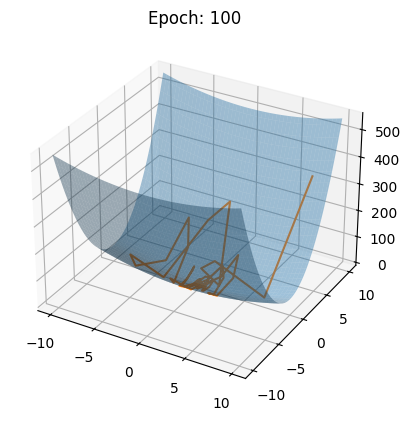

In [7]:
# GIF Animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.4)
line, = ax.plot([], [], [])

def update(epoch):
    line.set_data(trajectory[:epoch,0], trajectory[:epoch,1])
    line.set_3d_properties([loss_function(w) for w in trajectory[:epoch]])
    ax.set_title(f'Epoch: {epoch}')
    return line,

ani = FuncAnimation(fig, update, frames=len(trajectory), interval=100)
ani.save('Momentum_animation.gif', writer='pillow', fps=10)
plt.show()